# Problem Set 3 Solutions

## 18.330 Intro to Numerical Analysis (MIT, Spring 2019) 

Henrik Ronellenfitsch & Boya Song 

## Problem 1. Adaptive ODE Integrator

In [1]:
using LinearAlgebra
using PyPlot
PyPlot.svg(true)

function improved_euler_step(f, t, h, u)
    """ Take one step with the improved Euler method
    """
    u_Euler = u .+ h*f(t, u)
    return u .+ h/2 .* ( f(t, u) .+ f(t, u_Euler) )
end

function RK4_step(f, t, h, u)
    """ Take one step with the fourth order Runge-Kutta method
    """
    # sample slopes
    s1 = h*f(t, u)
    s2 = h*f(t + h/2, u .+ (h/2)*s1)
    s3 = h*f(t + h/2, u .+ (h/2)*s2)
    s4 = h*f(t + h, u .+ h*s3)
    
    return u .+ (s1 + 2s2 + 2s3 + s4)/6.0
end

function ode_adaptive(f, u0, t0, t1, h0; hmax=0.1)
    # we don't know how many data points we need yet,
    # so we start with an array containing only the initial data
    ts = [t0]
    us = [u0]
    
    h = h0
    while ts[end] < t1        
        t = ts[end]

        # make sure that the final step takes us exactly to t1
        if t + h > t1
            h = t1 - t
        end
            
        # compute two approximations for the next step
        u = us[end]
        u_IE = improved_euler_step(f, t, h, u)
        u_RK4 = RK4_step(f, t, h, u)
        
        # compare the relative difference of the *steps*
        difference = norm(u_IE - u_RK4)/norm(u .- u_RK4)
        
        if difference < 0.01
            # stepsize is too small,
            # retain RK4 result
            push!(ts, t + h)
            push!(us, u_RK4)
            
            # increase stepsize, don't exceed hmax
            h = min(1.2h, hmax)
        elseif difference > 0.2
            # stepsize is too large, decrease
            h = .8h
            
            # do nothing, next iteration will recompute from current step
        else
            # stepsize is fine, retain RK4 result
            push!(ts, t + h)
            push!(us, u_RK4)            
        end  
    end
    
    return ts, us
end

ode_adaptive (generic function with 1 method)

In [5]:
f(t, u) = cos.(t .* u.^2)

ts, us = ode_adaptive(f, [3.0], 0.0, 10.0, 1e-5)

([0.0, 1.0e-5, 2.2e-5, 3.64e-5, 5.368e-5, 7.4416e-5, 9.92992e-5, 0.000129159, 0.000164991, 0.000207989  …  9.91966, 9.92886, 9.93805, 9.94725, 9.95645, 9.96564, 9.97484, 9.98404, 9.99323, 10.0], Array{Float64,1}[[3.0], [3.00001], [3.00002], [3.00004], [3.00005], [3.00007], [3.0001], [3.00013], [3.00016], [3.00021]  …  [0.892167], [0.891751], [0.891335], [0.890919], [0.890504], [0.89009], [0.889676], [0.889263], [0.88885], [0.888553]])

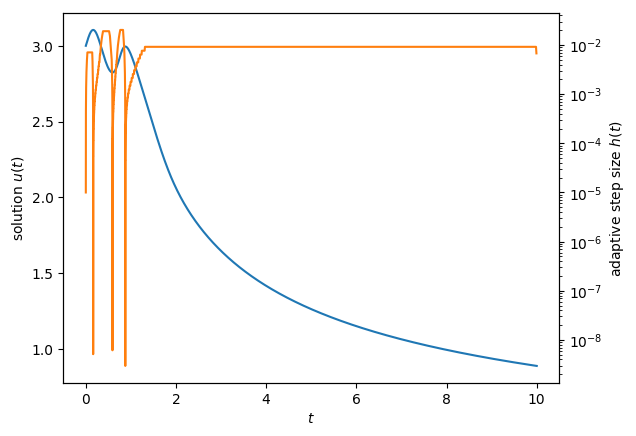

PyObject Text(608.0514637586806, 0.5, 'adaptive step size $h(t)$')

In [6]:
figure()

plot(ts, us)
xlabel(L"t")
ylabel(L"solution $u(t)$")

hs = diff(ts)
ax2 = twinx()
ax2[:_get_lines][:get_next_color]()
ax2[:semilogy](ts[1:end-1], hs)
ax2[:set_ylabel](L"adaptive step size $h(t)$")

## Problem 2. The van-der-Pol oscillator

### (a) Analytic solution.
For $\mu=0$ and $f(t) = 0$ we have simple harmonic oscillator:

$$
\ddot x + x = 0.
$$
The analytic solution with $x(0)=0$ and $\dot x(0)=1$ is therefore
$$
x(t) = \sin(t), \quad \dot x(t) = \cos t.
$$

In the phase plane we obtain:

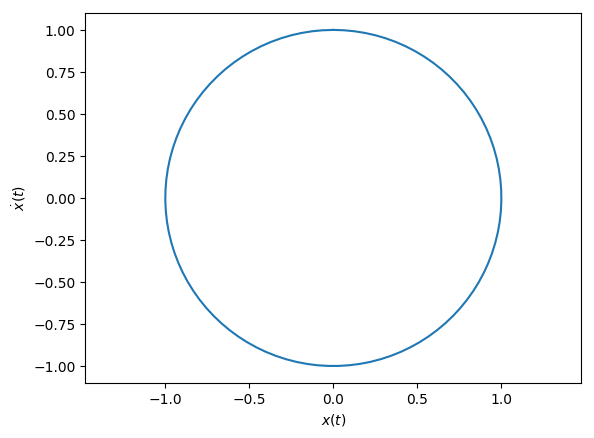

(-1.0998615404412626, 1.0998615404412626, -1.0994713695023444, 1.0999748271191592)

In [7]:
ts = LinRange(0, 2π, 100)

xs = sin.(ts)
xdots = cos.(ts)

figure()
plot(xs, xdots)

xlabel(L"x(t)")
ylabel(L"\dot x(t)")
axis("equal")

### (b) Numerical solution with adaptive integration

In [16]:
function vdP(t, u, μ, f)
    return [u[2], -u[1] + μ*(1 .- u[1].^2)*u[2] .+ f(t)]
end

null_forcing(t) = 0

f(t, u) = vdP(t, u, 5.0, null_forcing)

f (generic function with 1 method)

In [21]:
# solve using adaptive integration
ts, us = ode_adaptive(f, [0.0, 1.0], 0.0, 20.0, 1e-5)

([0.0, 1.0e-5, 2.2e-5, 3.64e-5, 5.368e-5, 7.4416e-5, 9.92992e-5, 0.000129159, 0.000164991, 0.000207989  …  19.195, 19.295, 19.395, 19.495, 19.595, 19.695, 19.795, 19.895, 19.995, 20.0], Array{Float64,1}[[0.0, 1.0], [1.0e-5, 1.00005], [2.20006e-5, 1.00011], [3.64022e-5, 1.00018], [5.36853e-5, 1.00027], [7.44269e-5, 1.00037], [9.93194e-5, 1.0005], [0.000129194, 1.00065], [0.000165049, 1.00083], [0.000208083, 1.00104]  …  [-1.84806, 0.151209], [-1.83293, 0.153409], [-1.81757, 0.155712], [-1.80199, 0.158126], [-1.78617, 0.160661], [-1.77009, 0.163327], [-1.75374, 0.166136], [-1.73711, 0.169099], [-1.72019, 0.172233], [-1.71933, 0.172398]])

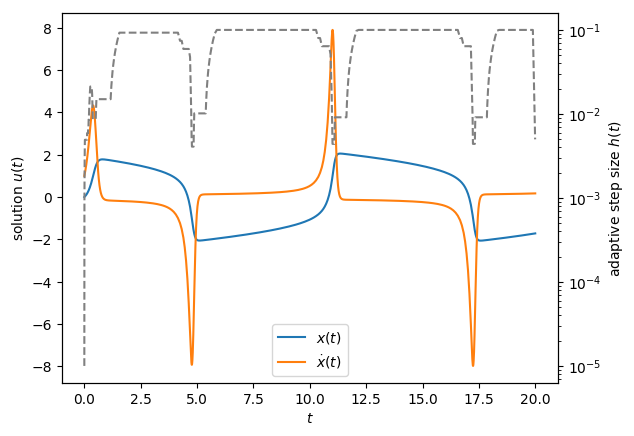

PyObject Text(606.5514637586806, 0.5, 'adaptive step size $h(t)$')

In [22]:
# trajectory plot
figure()

plot(ts, hcat(us...)[1,:], label=L"x(t)")
plot(ts, hcat(us...)[2,:], label=L"\dot{x}(t)")

xlabel(L"t")
ylabel(L"solution $u(t)$")
legend(loc=8)

hs = diff(ts)
ax2 = twinx()
ax2[:semilogy](ts[1:end-1], hs, color="0.5", linestyle="--")
ax2[:set_ylabel](L"adaptive step size $h(t)$")

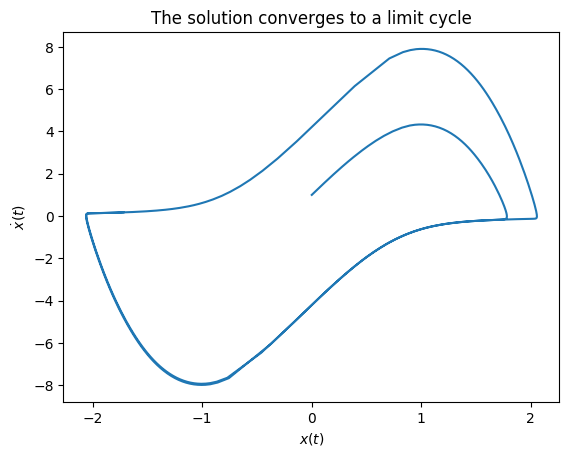

PyObject Text(0.5, 1.0, 'The solution converges to a limit cycle')

In [24]:
# phase space plot
figure()

plot(hcat(us...)[1,:], hcat(us...)[2,:])

xlabel(L"x(t)")
ylabel(L"\dot x(t)")

title("The solution converges to a limit cycle")

### (c) Solution with nontrivial forcing function

In [25]:
forcing(t) = π/2 + atan(1000*sin(t))

f(t, u) = vdP(t, u, 5.0, forcing)

f (generic function with 1 method)

In [28]:
# solve using adaptive integration
ts, us = ode_adaptive(f, [0.0, 1.0], 0.0, 80.0, 1e-5)

([0.0, 1.0e-5, 2.2e-5, 3.64e-5, 5.368e-5, 7.4416e-5, 9.92992e-5, 0.000129159, 0.000164991, 0.000207989  …  79.2111, 79.2769, 79.3558, 79.4505, 79.5505, 79.6505, 79.7505, 79.8505, 79.9505, 80.0], Array{Float64,1}[[0.0, 1.0], [1.0e-5, 1.00007], [2.20008e-5, 1.00014], [3.64029e-5, 1.00024], [5.3687e-5, 1.00035], [7.44304e-5, 1.00049], [9.93258e-5, 1.00066], [0.000129205, 1.00086], [0.000165068, 1.0011], [0.000208113, 1.00139]  …  [1.77451, -0.162408], [1.76383, -0.164249], [1.75086, -0.166514], [1.73508, -0.169346], [1.71813, -0.172502], [1.70086, -0.175847], [1.68326, -0.179398], [1.6653, -0.183176], [1.64697, -0.187207], [1.63769, -0.189339]])

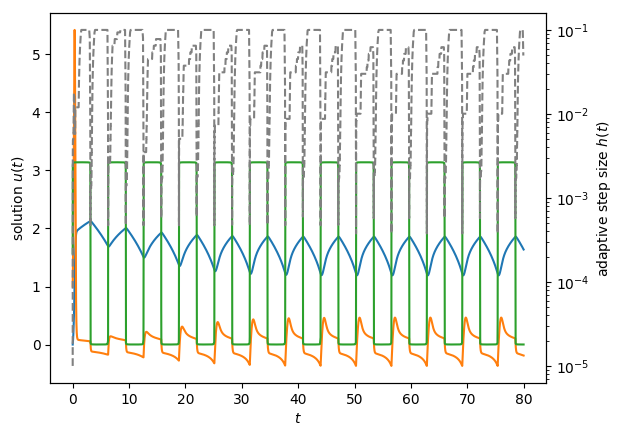

PyObject Text(594.9264637586806, 0.5, 'adaptive step size $h(t)$')

In [29]:
# trajectory plot
figure()

plot(ts, hcat(us...)[1,:], label=L"x(t)")
plot(ts, hcat(us...)[2,:], label=L"\dot{x}(t)")
plot(ts, forcing.(ts), label=L"f(t)")

xlabel(L"t")
ylabel(L"solution $u(t)$")

hs = diff(ts)
ax2 = twinx()
ax2[:semilogy](ts[1:end-1], hs, color="0.5", linestyle="--")
ax2[:set_ylabel](L"adaptive step size $h(t)$")

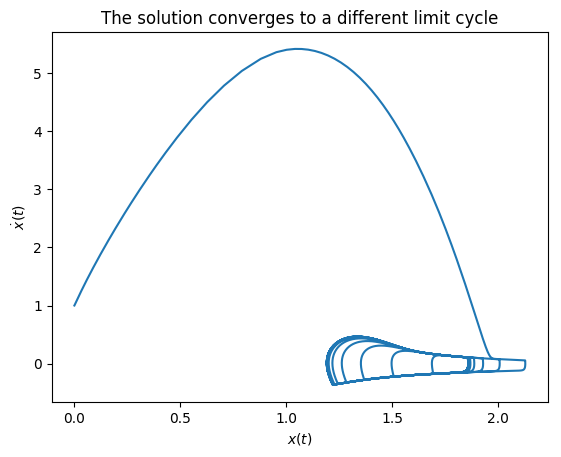

PyObject Text(0.5, 1.0, 'The solution converges to a different limit cycle')

In [32]:
# phase space plot
figure()

plot(hcat(us...)[1,:], hcat(us...)[2,:])

xlabel(L"x(t)")
ylabel(L"\dot x(t)")

title("The solution converges to a different limit cycle")

## Problem 3. Avoiding castrophic loss of precision

### (a) 
Proposition:

$$
I_n(x) = \frac{x^{n+1}e^x}{n!} \int_0^1 u^n e^{-u x}\, du = e^x - \sum_{i=0}^n \frac{x^i}{i!}.
$$

Proof (Induction):

(i) We check
$$
I_0(x) = x e^x \int_0^1 e^{-u x}\,du = x e^x
\left[-\frac{1}{x}e^{-ux} \right]_{u=0}^{u=1} = x e^x \left( -\frac{1}{x} e^{-x} + \frac{1}{x} \right) = -1 + e^x,
$$
which matches the formula.

(ii) The induction step. We compute
$$
\int_0^1 u^n e^{-u x}\,du = \left[ - \frac{u^n}{x} e^{-ux} \right]_{u=0}^{u=1} + \int_0^1 n u^{n-1} \frac{1}{x} e^{-ux}\,du
= -\frac{1}{x} e^{-x} + \frac{n}{x} \int_0^1 u^{n-1} e^{-ux}\,du.
$$

This means that
$$
I_n(x) = -\frac{x^{n+1}e^x}{n!} \frac{1}{x} e^{-x} + \frac{x^{n+1}e^x}{n!} \frac{n}{x} \int_0^1 u^{n-1} e^{-ux}\,du
= - \frac{x^n}{n!} + \underbrace{ \frac{x^{n}e^x}{(n-1)!} \int_0^1 u^{n-1} e^{-ux}\,du }_{=I_{n-1}(x)}.
$$

By the induction hypothesis, the formula is true for $I_{n-1}(x)$, so
$$
I_n(x) = - \frac{x^n}{n!} + e^x - \sum_{i=0}^{n-1} \frac{x^i}{i!} = e^x - \sum_{i=0}^{n} \frac{x^i}{i!},
$$
which proves the proposition.

The desired analytic formulas are therefore
\begin{align}
I_0(x) &= e^x - 1 \\
I_1(x) &= e^x - 1 - x \\
I_2(x) &= e^x - 1 - x - \frac{1}{2}x^2 \\
I_3(x) &= e^x -1 -x - \frac{1}{2}x^2 - \frac{1}{6} x^3.
\end{align}

### (b)

In [13]:
function I_n(n, x)
    I = exp(x)
    
    for i=0:n
        I -= x^i/factorial(i)
    end
    
    return I
end

for n=0:3
    println("Analytical formula I_$(n)(1e-4) = ", I_n(n, 1e-4))
end

Analytical formula I_0(1e-4) = 0.0001000050001667141
Analytical formula I_1(1e-4) = 5.000166714092739e-9
Analytical formula I_2(1e-4) = 1.667140927391614e-13
Analytical formula I_3(1e-4) = 4.742607249470791e-17


### (c)

In [12]:
# We use the code from class

function simpsons_rule(f, a, b, N)
    Δ = (b - a)/N
    h = Δ/2
    
    I = h*f(a)/3 + h*f(b)/3
    for n=1:N-1
        I += h*( 2*f(a + 2*n*h) + 4*f(a+ (2*n-1)*h))/3
    end
    I += 4*h*f(a+ (2*N-1)*h)/3
    
    return I
end

f(n, x, u) = u^n * exp(-u*x)
x = 1e-4

for n=0:3
    integral = simpsons_rule(u -> f(n, x, u), 0.0, 1.0, 1000)
    i_n = integral*x^(n+1)*exp(x)/factorial(n)
    
    println("Simpson's rule: I_$(n)(1e-4) = ", i_n)
end

Simpson's rule: I_0(1e-4) = 0.00010000500016667084
Simpson's rule: I_1(1e-4) = 5.00016667083342e-9
Simpson's rule: I_2(1e-4) = 1.666708334166679e-13
Simpson's rule: I_3(1e-4) = 4.16675000138891e-18


### (d)

Comparing to the accurate integrals, we see that the Simpson's
rule fares much better than the analytical formula for higher $n$.
The reason is that in the analytical formula, we
the first term $e^x \approx 1$, and then we subtract subsequently smaller and
smaller terms from this. Since the values of the integral are quite small in the end,
we lose precision due to rounding error, until at $I_3$, the result
computed with the analytical formula is basically garbage, while the numerically
evaluated integral is quite accurate.

Because this is a common issue when calculating numbers involving
$$
e^x -1,
$$

Julia and many other programming languages include a special function

    expm1(x)
    
which computes $e^x-1$ to high accuracy.


### (e)
We can rewrite the formula to avoid subtracting small numbers from large numbers by noting that
$$
e^x - \sum_{i=0}^n \frac{x^i}{i!} = \sum_{i=n+1}^\infty \frac{x^i}{i!}.
$$
This sum contains only small numbers and can be approximated well by a few summands.

In [19]:
function I_n_improved(n, x; N=16)
    I = 0.0
    
    for i=n+1:n+N+1
        I += x^i/factorial(i)
    end
    
    return I
end

for n=0:3
    println("Improved analytical formula I_$(n)(1e-4) = ", I_n_improved(n, 1e-4))
end

# The result is much more accurate now

Improved analytical formula I_0(1e-4) = 0.00010000500016667082
Improved analytical formula I_1(1e-4) = 5.000166670833417e-9
Improved analytical formula I_2(1e-4) = 1.6667083341666808e-13
Improved analytical formula I_3(1e-4) = 4.1667500013889096e-18


A different option would be to use the expm1(x) function

In [3]:
function I_n_improved2(n, x)
    I = expm1(x)
    
    if n == 0
        return I
    end
        
    for i=1:n
        I -= x^i/factorial(i)
    end
    
    return I
end

for n=0:3
    println("expm1 formula I_$(n)(1e-4) = ", I_n_improved2(n, 1e-4))
end

# The result is much more accurate now (but not quite as good as the first improvement)

expm1 formula I_0(1e-4) = 0.00010000500016667084
expm1 formula I_1(1e-4) = 5.0001666708330726e-9
expm1 formula I_2(1e-4) = 1.6667083307247923e-13
expm1 formula I_3(1e-4) = 4.166405812536281e-18


## Problem 4. Recursive Newton-Cotes

In [51]:
function recursive_simpsons(f, a, b, N; base_threshold=100)
    ## For small N just integrate with Simpson's rule directly
    if N < base_threshold
        return simpsons_rule(f, a, b, N)
    else
        # split up the integration into two parts of similar magnitude.
        # make sure to correctly handle the case where N is odd.
        N_half = Int64(floor(N/2))
        return recursive_simpsons(f, a, (a+b)/2, N_half) + recursive_simpsons(f, (a+b)/2, b, N - N_half)
    end
end

f(x) = log(x)^3
I_exact = 0.10109738718799412444
Ns = collect(10.0 .^(0:8))

errors_direct = abs.([(simpsons_rule(f, 1, 2, N) - I_exact)/I_exact for N in Ns])
errors_recursive = abs.([(recursive_simpsons(f, 1, 2, N) - I_exact)/I_exact for N in Ns])

9-element Array{Float64,1}:
 0.011412505798689831  
 2.1939199095698787e-6 
 2.2148011783657713e-10
 2.2375250989101632e-14
 1.3727147846074622e-16
 1.3727147846074622e-16
 1.3727147846074622e-16
 1.3727147846074622e-16
 1.3727147846074622e-16

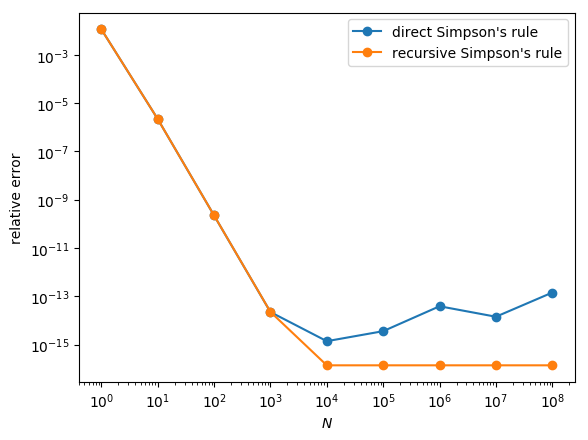

PyObject Text(24.000000000000007, 0.5, 'relative error')

In [52]:
figure()

loglog(Ns, errors_direct, "o-", label="direct Simpson's rule")
loglog(Ns, errors_recursive, "o-", label="recursive Simpson's rule")

legend()
xlabel(L"N")
ylabel("relative error")

Both methods are equally good up until $N=10^3$. For higher $N$ the recursive method
performs better, because it only sums up numbers of similar magnitude.
This way, by increasing $N$, no precision is lost, in contrast to the direct Simpson's method.
The direct method becomes slowly worse as the number of subdivisions is increased
beyond $N\approx 10^4$.

## Problem 5. Kahan summation

### (a) The sum is correct analytically

The Kahan summation algorithm is
\begin{align*}
y_n &= s_n - c_{n-1} \\
t_n &= S_{n-1} + y_n \\
c_n &= (t_n - S_{n-1}) - y_n \\
S_n &= t_n,
\end{align*}

We show that the proposition by checking step-by-step.
Generally, we find the algebraic (in exact arithmetic) relation
$$
c_n = t_n - S_{n-1} - y_n = S_{n-1} + y_n - S_{n-1} - y_n = 0
$$

In general, we find the recursion relation
$$
S_n = t_n = S_{n-1} + y_n = S_{n-1} + s_n + \underbrace{c_{n-1}}_{=0} = S_{n-1} + s_n.
$$

We can continue to iterate this and obtain,
$$
S_N = S_{N-1} + s_N = S_{N-2} + s_{N-1} + s_N = \dots = \underbrace{S_0}_{=0} + s_1 + s_2 + \dots + s_N = \sum_{i=1}^N s_n,
$$
as desired.


### (b) An example in 6-digit floating point arithmetic

We want to calculate 10000.0 + 4.14159 + 1.71828.

(i) In exact arithmetic we find, 10005.85987. Rounding to 6-digit accuracy, this is
        $1.00059 \times 10^5$ 
        
(ii) Let's compute the sum in 6-digit floating point arithmetic, one summand after the other,
and rounding the results.
First, 
\begin{align}
  & 1.00000 \times 10^5\\
+ & 4.14159 \times 10^0 \\
= & 1.00041 \times 10^5
\end{align}

Next,
\begin{align}
&   1.00041 \times 10^5 \\
+ & 1.71828 \times 10^0 \\
= & 1.00058 \times 10^5,
\end{align}

which is incorrectly rounded at 1 ulp (unit in last place).

(iii) We compute the sum using Kahan summation in 6-digit floating point accuracy.
First,
\begin{align}
y_1 &= 10000.0 - 0 = 10000.0 \\
t_1 &= S_0 + y_1 = 10000.0 \\
c_1 &= (t_1 - S_0) - y_1 = 10000.0 - 10000.0 = 0.0 \\
S_1 &= t_1 = 10000.0
\end{align}

Next,
\begin{align}
y_2 &= 4.14159 - c_1 = 4.14159 \\
t_2 &= S_1 + y_2 = 10000.0 + 4.14159 = 10004.1 \\
c_2 &= (t_2 - S_1) - y_2 = ( 10004.1 - 10000.0 ) - 4.14159 = 4.1 - 4.14159 = -0.041590 \\
S_2 &= t_2 = 10004.1
\end{align}

And finally,

\begin{align}
y_3 &= 1.71828 - c_2 = 1.71828 - (-0.041590) = 1.75987 \\
S_3 = t_3 &= S_2 + y_3 = 10004.1 + 1.75987 = 10005.9,
\end{align}

which is the correctly rounded result.
Kahan summation is able to achieve this by keeping a running compensation
(the $c_n$ variables), where those digits are stored that would be lost through rounding
errors.

### (c) Implementation

In [33]:
function sum_kahan(x, N)
    S = 0.0 # sum
    c = 0.0 # running compensation
    
    for i=1:N
        y = x - c # subtract the compensation 
        t = S + y # add sum and compensation, c is small and will be corrupted
        
        c = (t - S) - y # (t - S) is the "big" part of the sum, so c contains the compensated "small" part
        S = t
    end
    
    return S
end

function sum_pairwise(x, N; base_threshold=100)
    """ Sum up ∑_{i=1}^{N} x using pairwise summation
    """
    
    # for a small number of summands, we just perform a direct sum
    # this is done to amortize the overhead due to recursion where recursion is not necessary
    if N < base_threshold
        return sum_direct(x, N)
    else
        # split up the summation into two parts of similar magnitude.
        # make sure to correctly handle the case where N is odd.
        N_half = Int64(floor(N/2))
        return sum_pairwise(x, N_half) + sum_pairwise(x, N - N_half)
    end
end

function sum_direct(x, N)
    """ Sum up ∑_{i=1}^{N} x
    """
    
    S = 0.0;
    for i=1:N
        S += x
    end
    
    return S
end

sum_direct (generic function with 1 method)

In [34]:
Ns = 10.0.^range(2, 9)
errors = [ abs(sum_kahan(π/N, N) - π)/π for N in Ns]
errors_pw = [ abs(sum_pairwise(π/N, N) - π)/π for N in Ns]
errors_naive = [ abs(sum_direct(π/N, N) - π)/π for N in Ns]

8-element Array{Float64,1}:
 1.4135798584282298e-15
 1.7952464202038517e-14
 1.342900865506818e-13 
 5.925726766531139e-13 
 3.846633510754898e-12 
 1.8083856449879422e-10
 2.2956210363927155e-9 
 2.380591095510059e-8  

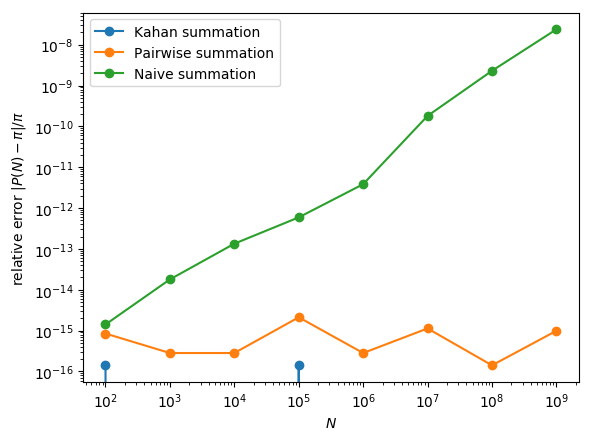

PyObject <matplotlib.legend.Legend object at 0x7efc317a3518>

In [35]:
loglog(Ns, errors, "o-", label="Kahan summation")
loglog(Ns, errors_pw, "o-", label="Pairwise summation")
loglog(Ns, errors_naive, "o-", label="Naive summation")

xlabel(L"N")
ylabel(L"relative error $|P(N) - \pi|/\pi$")

legend()

## The pairwise summation error is small and (approximately) constant, we don't see the log(N) part
## The error in Kahan summation is almost always exactly zero (and therefore does not even show up on the plot).

## Problem 6. The representable set

We pick a number system with 2 decimal digits in the mantissa and one digit in the exponent.

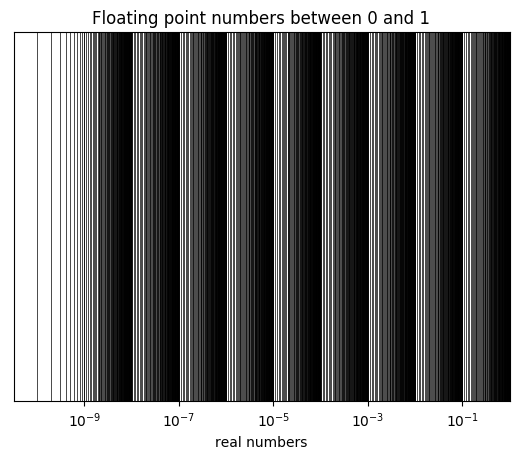

PyObject Text(0.5, 1.0, 'Floating point numbers between 0 and 1')

In [63]:
mantissa_2_numbers = collect(0:99)/10
all_2_numbers = [m*10.0^ex for ex in -9:9 for m in mantissa_2_numbers]
            
figure()
semilogx([], [])
for n in [m for m in all_2_numbers if 0 <= m <= 1]
    axvline(n, color="k", linewidth=0.5)
end
                        
xlabel("real numbers")
xlim(0, 1)
yticks([])
title("Floating point numbers between 0 and 1")

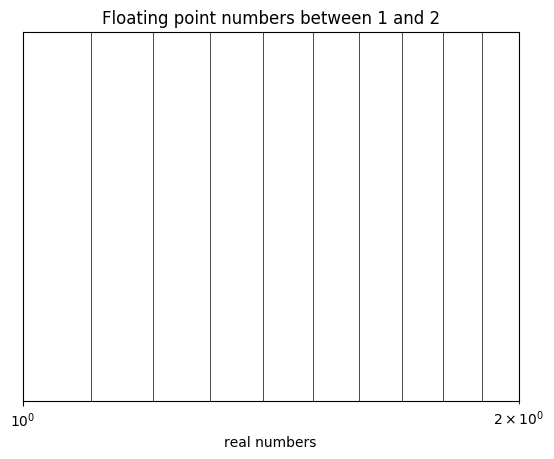

PyObject Text(0.5, 1.0, 'Floating point numbers between 1 and 2')

In [60]:
figure()
semilogx([], [])
for n in [m for m in all_2_numbers if 1 <= m <= 2]
    axvline(n, color="k", linewidth=0.5)
end
                        
xlabel("real numbers")
xlim(1, 2)
yticks([])
title("Floating point numbers between 1 and 2")

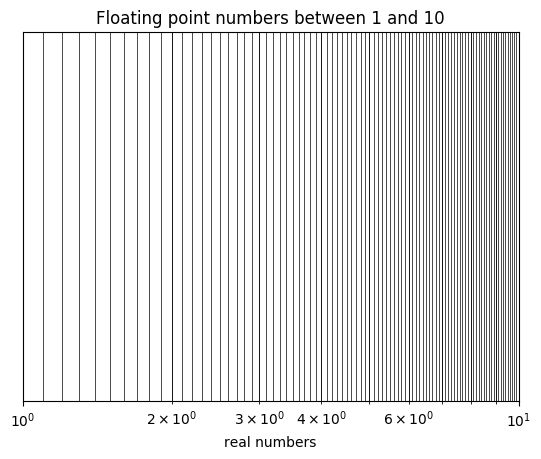

PyObject Text(0.5, 1.0, 'Floating point numbers between 1 and 10')

In [61]:
figure()
semilogx([], [])
for n in [m for m in all_2_numbers if 1 <= m <= 10]
    axvline(n, color="k", linewidth=0.5)
end
                        
xlabel("real numbers")
xlim(1, 10)
yticks([])
title("Floating point numbers between 1 and 10")

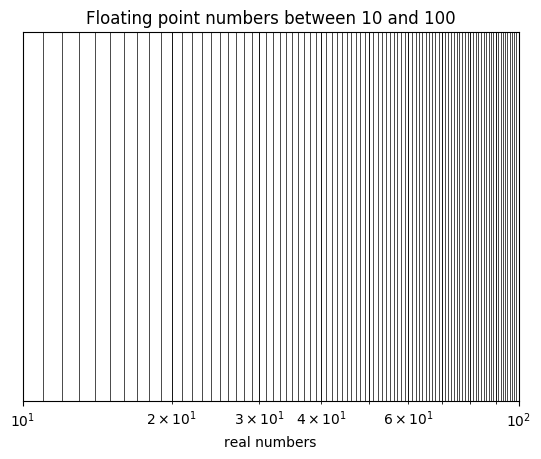

PyObject Text(0.5, 1.0, 'Floating point numbers between 10 and 100')

In [62]:
figure()
semilogx([], [])
for n in [m for m in all_2_numbers if 10 <= m <= 100]
    axvline(n, color="k", linewidth=0.5)
end
                        
xlabel("real numbers")
xlim(10, 100)
yticks([])
title("Floating point numbers between 10 and 100")

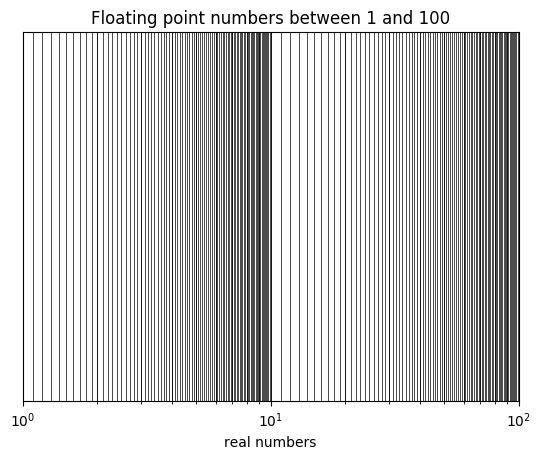

PyObject Text(0.5, 1.0, 'Floating point numbers between 1 and 100')

In [69]:
figure()
semilogx([], [])
for n in [m for m in all_2_numbers if 1 <= m <= 100]
    axvline(n, color="k", linewidth=0.5)
end
                        
xlabel("real numbers")
xlim(1, 100)
yticks([])
title("Floating point numbers between 1 and 100")